**PREDICTION OF SYRIATEL COMPANY CUSTOMER CHURN**

Student name: Wyclife Orimba

Student pace: Part Time

Scheduled project review date/time: 23th October 2023

Instructor name: Samuel Karu

**Project Overview**

SyriaTel, a prominent telecommunications firm, is confronted with the issue of customer churn. In order to mitigate financial losses and ensure the organization's long-term stability, this project seeks to create a classification model that predicts customers' churn through the identification of related patterns and influential factors. Consequently, the company can proactively implement strategies informed by these findings to preserve its customer base and ensured sustained growth.

**Business Problem**

Due to the cut-throat competition in telecommunication industry there as been concerns on predicting the customer churn in order to retain customers. SyriaTel Telecommunications is a company committed to facilitating uninterrupted communication and connecting individuals seamlessly. In its unwavering commitment to achieve the highest standards, it confronts the issue of customer churn(reduction in its customer base).

Every disconnection not only signifies a departure but also presents a risk to the company's financial growth and long-term viability. By understanding the factors and patterns linked to this challenge and creating a classification model that accurately predicts customer churn, SyriaTel can implement specific strategies to avert the customers' churn and secure the ongoing success of its business.

**Justification of the Study**

In any business, it's much easier to keep an existing customer than to get a new one. Tp Keep an existing customer is however not easy. Companies that do not invest in maintaining a strong customer relationship are at a risk of high churn rates, and high churn rates can jeopardize a company's future. When a company loses even a sigle customer, there is an obvious loss of their business, which includes any immediate loss in revenues. This study seeks to identify any potential customer churn instances, their causes and propose possible ways of averting such occurances.

**Project Objectives**

-To construct a predictive model using the available dataset to categorize customers as either having churned or remained with the company.

-To identify any noticeable patterns or trends linked to customers' churn.

-To offer practical insights to SyriaTel, enabling them to proactively implement measures aimed at customer retention once the model is created.

-To evaluate the model performance using appropriate/reliable evaluation metrics such as accuracy, precision, recall, and F1-score. -To identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help to mitigate churn rates in the company and improve customer retention.

**Project's Metric of Success**

-The project seeks to build a machine learning model with an accuracy score of above 75%.

**Data Understanding**

This will help us to acquire knowledge and comprehension about this dataset before further analysis and modeling.

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay, classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import multiprocessing # for reducing the runtime of gridsearch
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file and checking the data
df = pd.read_csv('/content/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#checking the shape of the data
df.shape

(3333, 21)

In [4]:
# checking for data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking for column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#checking for missing values in the dataset
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#checking for duplicate values
df.duplicated().sum()

0

In [8]:
#checking for statistical summary of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the above, we note that the dataset contains 3333 rows and 21 columns . This implies that there are 21 different variables each with 3333 records. The dataset consists of four main data types; float, integer, bool and object. It has no missing values and there are also no duplicated rows(values) in this dataset.

**Data Preparation**

Feature Engineering

I decided to create two new features: 'call_rates_day' and 'call_rates_night' to be a representative the ratio of the total day charges to the total day minutes and the ratio of the total night charges to the total night minutes respectively. This would help us determine if the charges incurred during day and night calls might be a contributing factor to the customers' churn.

In [9]:
df['call_rt_day'] = df['total day charge']/ df['total day minutes']
df['call_rt_night'] = df['total night charge']/ df['total night minutes']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_rt_day,call_rt_night
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False,0.170011,0.044994
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False,0.169988,0.045008
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False,0.170008,0.045018
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False,0.170007,0.044997
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False,0.170006,0.044997


In [10]:
#rechecking for missing values in the modified df
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
call_rt_day               2
call_rt_night             0
dtype: int64

The modified dataframe now has 2 missing values in the call_rate_day column. I chose to drop the missing values since they are not a significant number and would have no significant effect on the dataset.

In [11]:
# Dropping null values
df = df.dropna()

In [12]:
#checking to confirm they have been dropped
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
call_rt_day               0
call_rt_night             0
dtype: int64

**Exploratory Data Analysis**

Univariate Analysis of Numerical Variables



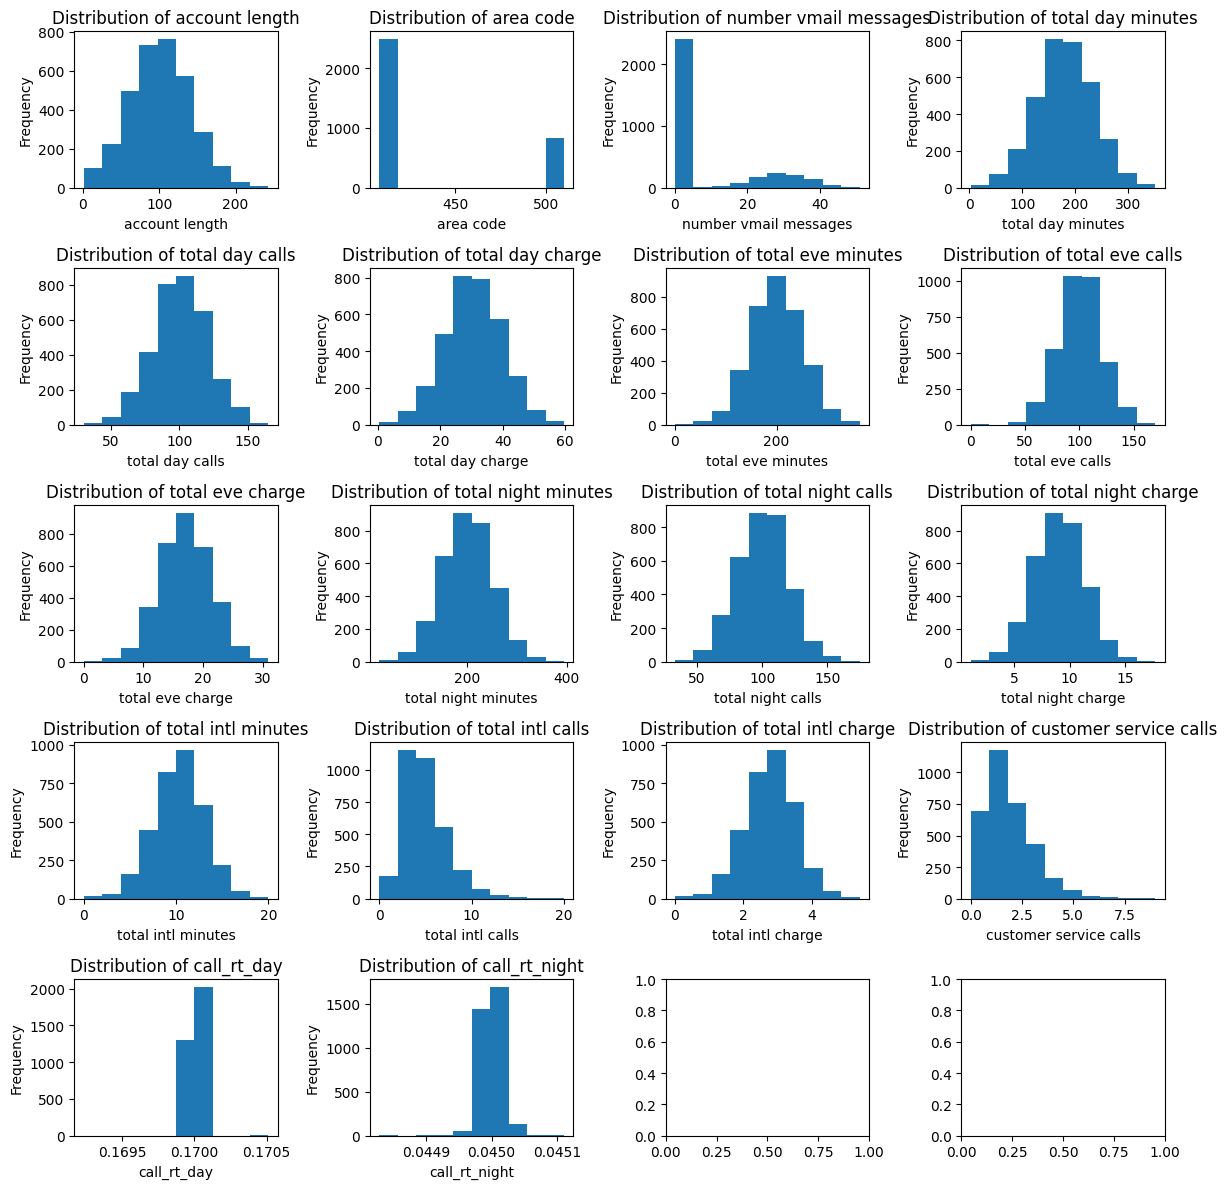

In [13]:
# Plotting histograms to visualize features' distribution

# Select numerical columns
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Setting the number of rows and columns for the subplots
num_rows = 5
num_cols = 4

# Setting the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plotting histograms for each numerical variable
for i, var in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(df[var], bins=10)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title('Distribution of ' + var)

plt.tight_layout()
plt.show()

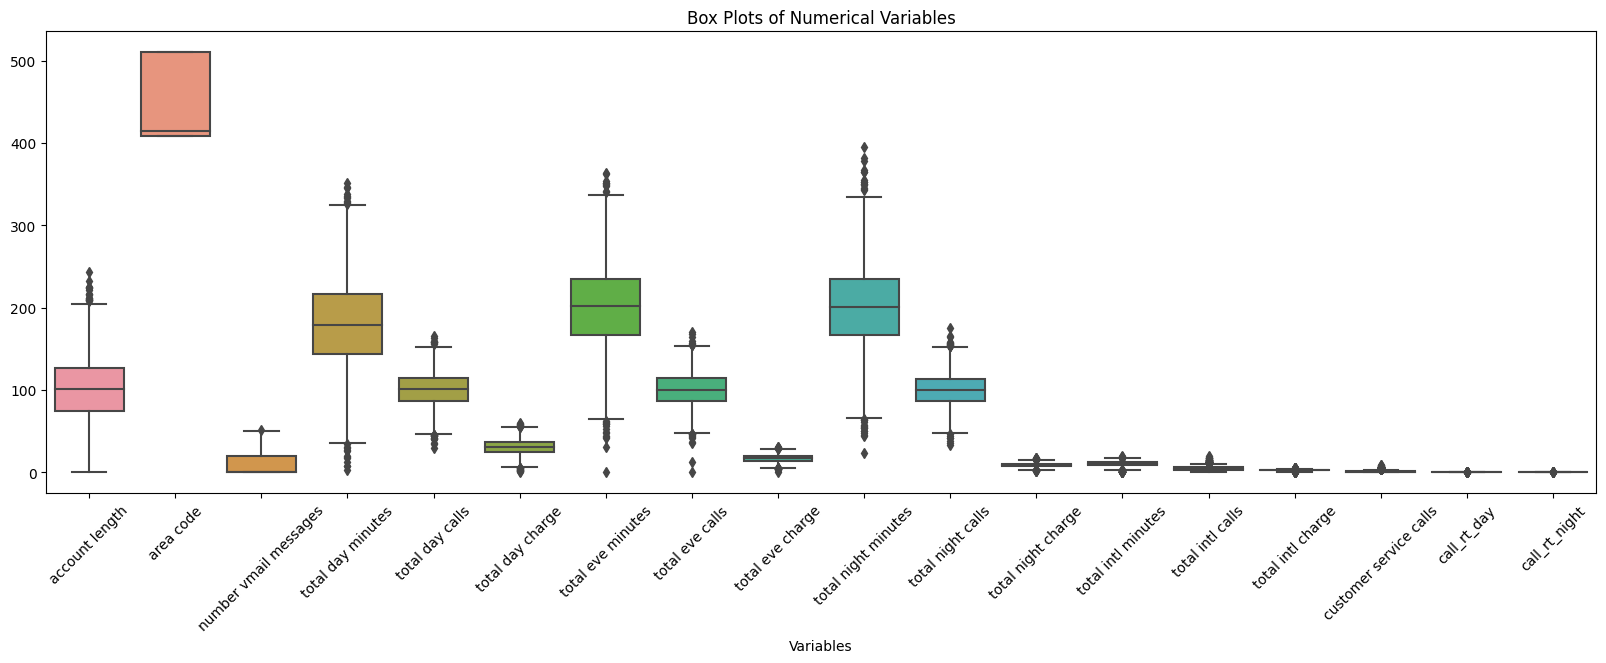

In [14]:
# Plotting boxplots to check for outliers

# Selecting numerical columns
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Setting the figure size
plt.figure(figsize=(20, 6))

# Plotting box plots for each numerical variable
sns.boxplot(data=df[numerical_variables])

# Setting the title and labels
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Variables')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [15]:
# A statistical view to confirm the outliers plotted above
min_max_summ = df.agg(['min', 'max'])
min_max_summ

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,call_rt_day,call_rt_night
min,AK,1,408,327-1058,no,no,0,2.6,30,0.44,...,23.2,33,1.04,0.0,0,0.0,0,False,0.169231,0.044828
max,WY,243,510,422-9964,yes,yes,51,350.8,165,59.64,...,395.0,175,17.77,20.0,20,5.4,9,True,0.170513,0.045111


For numerical variables' univariate analysis, I plotted histograms to provide an understanding of the frequency distribution of our features. It was noticed that most features in the dataset such as 'account length', 'total day minutes', 'total day calls', 'total day charge' and others had a somewhat normal distribution while 'customer service calls' and 'total intl calls' were positively skewed.

I also plotted box plots to check for outliers in the features in which it was found that most of the features exhibit a range of extreme values. These values represented the range of variability in the data for each corresponding feature. While this range of variablity could be considered as outliers, they were deemed as acceptable since they accurately reflected real-world scenarios in the telecommunications context.

**Exploratory analysis Categorical Variables**

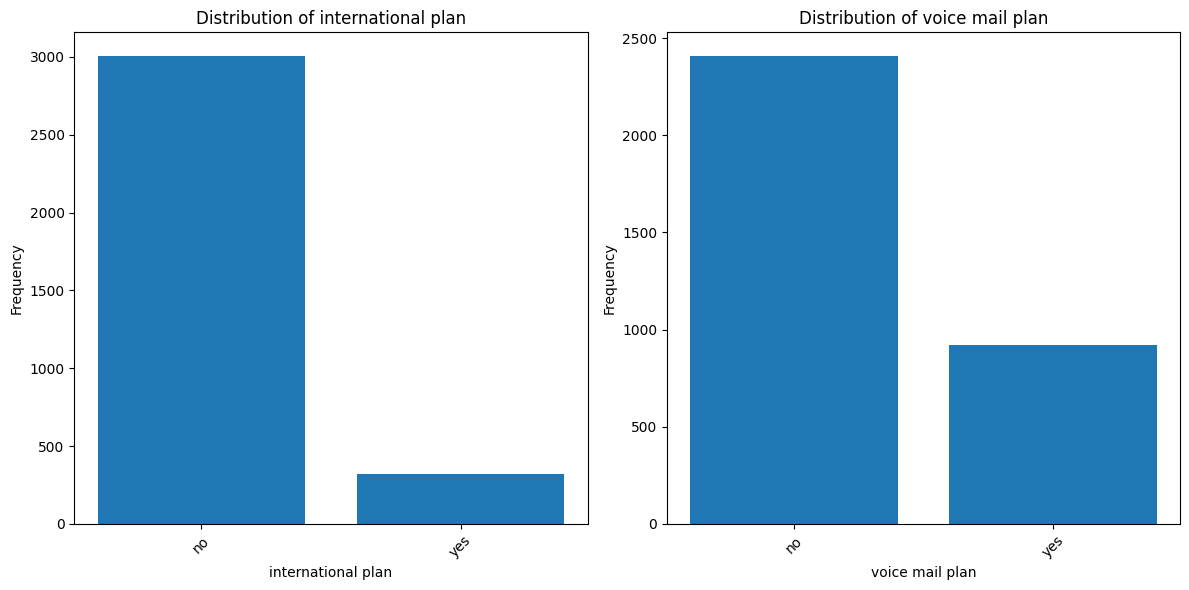

In [16]:
# Bar plots for categorical variables to show their distributions

# Selecting categorical columns excluding 'state' and 'phone number'
categorical_vars = df.select_dtypes(include=['object']).columns.drop(['state', 'phone number'])

# Setting the number of rows and columns for the subplots
num_rows = 1
num_cols = len(categorical_vars)

# Set the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Plot bar plots for each categorical variable
for i, var in enumerate(categorical_vars):
    axes[i].bar(df[var].value_counts().index, df[var].value_counts())
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('Distribution of ' + var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

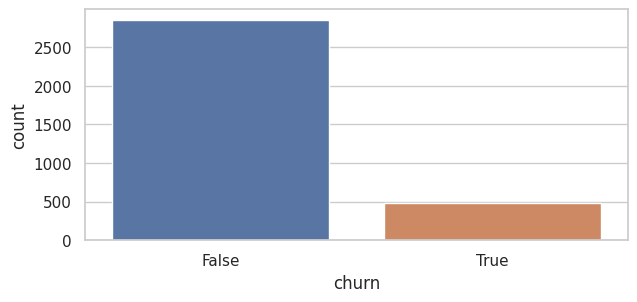

In [17]:
# Bargrapg plot for the target variable
sns.set_theme(style="whitegrid")
plt.figure(figsize =(7,3))
sns.countplot(data=df, x='churn');

In [18]:
churn_perc = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_perc)

Churn percentage is 14.470%.


In the analysis of categorical variables, bargraph plots were used to understand how the data is distributed. These bar plots revealed that only a small portion of the customers have either the international plan or the voice mail plan, and the majority of customers did not have these plans. This finding raises an interesting question: how do these plan subscriptions, or the lack thereof, influence customer churn?

When we looked at our target feature, 'churn,' through visualization, it was noticed that there is a class imbalance. This means that there's a substantial difference between the number of instances in the 'false' class and the 'true' class, with 'false' being the majority. This class imbalance for the target variable could lead to predictive models which are biased towards the majority (i.e. no churn)

Bivariate Analysis of numerical Variables



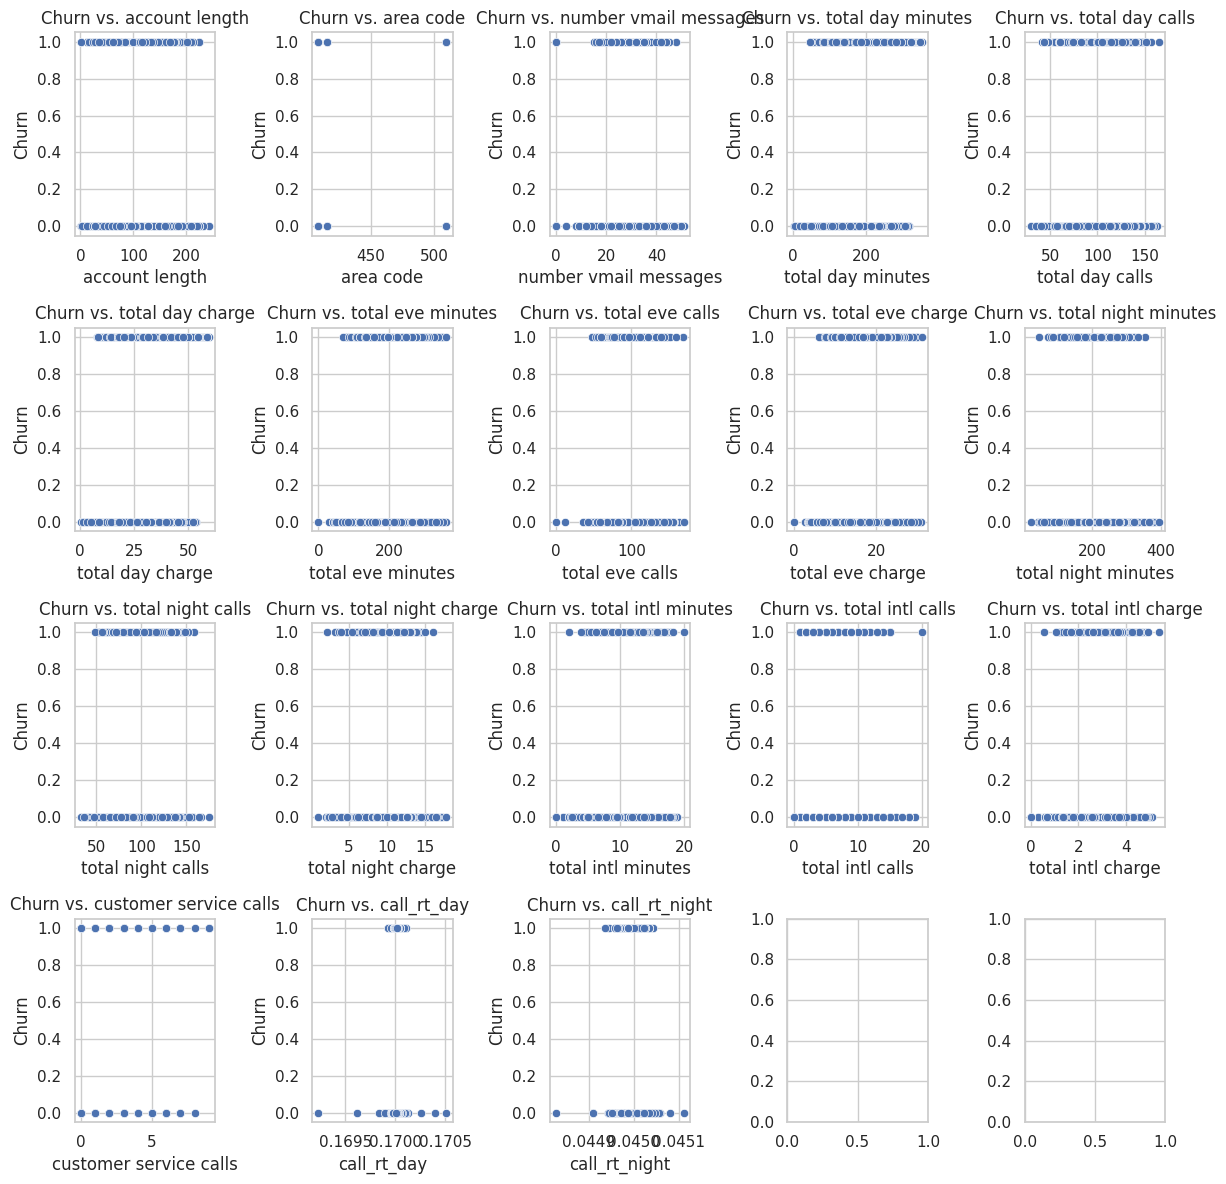

In [19]:
# Plotting of Scatter Plots to show the relationship between churn and the numerical variables

# Selecting numerical columns
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = -(-len(numerical_variables) // num_rows)  # Ceiling division to ensure enough subplots

# Setting the figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot scatter plots for each numerical variable against other numerical variables
for i, var in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(x=var, y='churn', data=df, ax=axes[row, col])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Churn')
    axes[row, col].set_title('Churn vs. ' + var)

plt.tight_layout()
plt.show()

Based on the bivariate analysis of numerical variables, scatter plots were used to visualize how these variables relate to customer churn. The findings indicate that the relationship between these variables and customer churn is not linear. This suggests that a classification model, rather than a linear one, is more suitable for this dataset. Such a model will be better at making predictions and uncovering hidden patterns and relationships within the data.

Bivariate analysis of categorical Variables

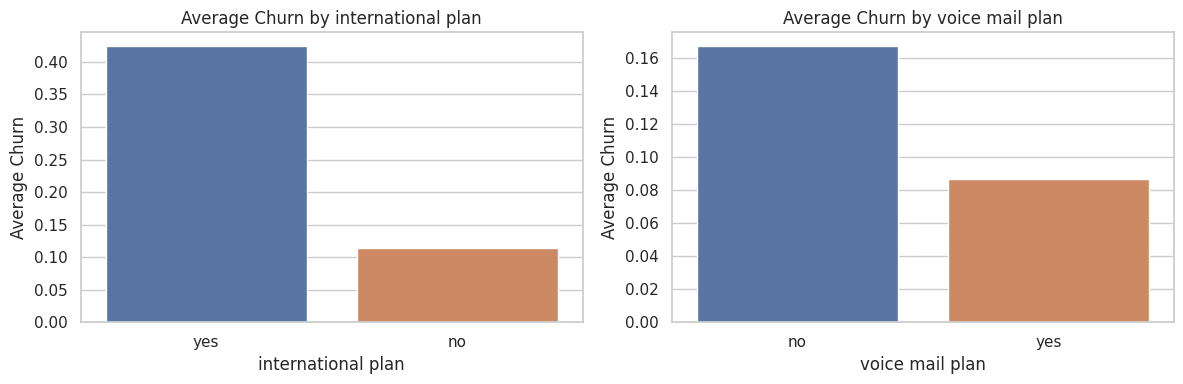

In [20]:
# Bar-graph plots to show relationship of categoricals and churn

# Defining the columns
Categorical_cols = ['international plan', 'voice mail plan']

# Creating bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(Categorical_cols), figsize=(12, 4))

# Generating bar plots for each column
for i, column in enumerate(Categorical_cols):
    grouped_data = df.groupby(column)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Churn')
    axes[i].set_title(f'Average Churn by {column}')

# Adjusting the layout and spacing
plt.tight_layout()

# Displaying the plots
plt.show()

In the bivariate analysis of the categorical variables, bar-graph plots were used to illustrate how "international plan" and "voicemail plan" relate to customer churn. The visualizations helped in understanding the connection between these variables and the probability of customers churning.

The observations from the visualizations show that customers who have an international plan tend to have a higher churn rate compared to those without such a plan. Additionally, customers who do not have a voicemail plan tend to exhibit a higher churn rate compared to those who have one.

**Data Preparation**

**Selecting most important feactures for our modelling**

In order to select best features for modelling,  we will use heatmap to check the correlation existing between variables to be used in the model.

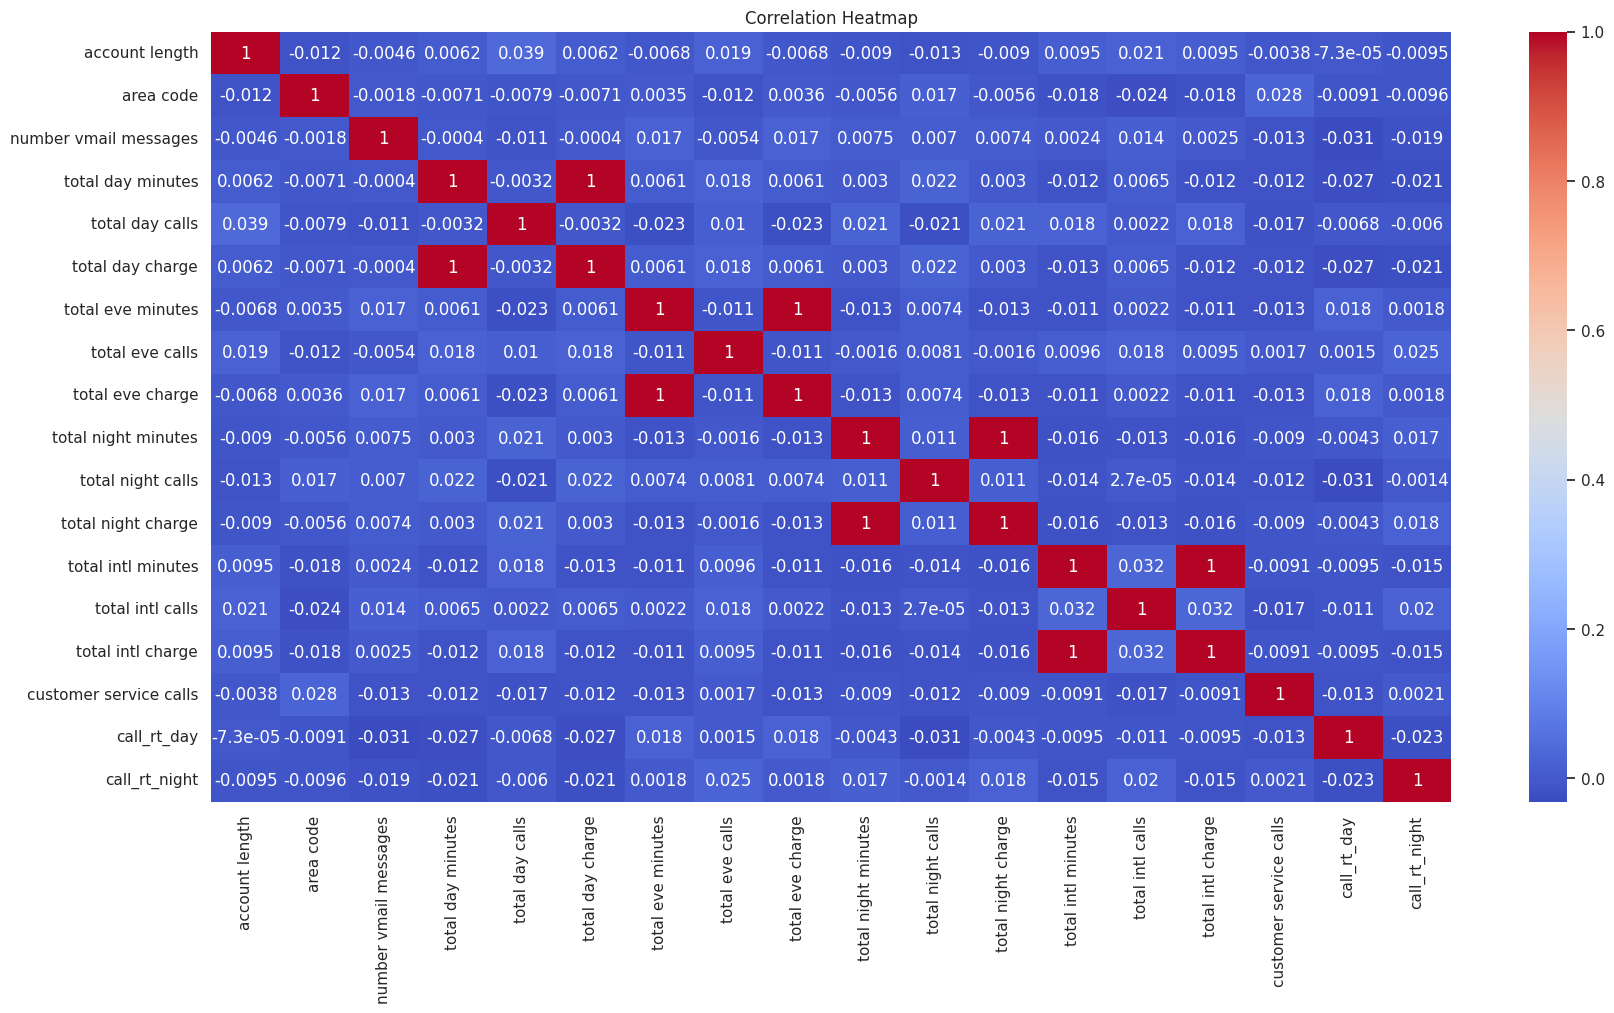

In [21]:
# Selecting numerical columns
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Creating a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Setting the title and display
plt.title('Correlation Heatmap')
plt.show()

As seen from the heatmap above, there are some variables that have a correlation of 1 that is perfect correlation with other variables.

Multicollinearity will occur if this predictor variables are highly correlated, which can lead to instability and unreliable estimates of the model parameters.

Hence we will remove one of the correlacetd factors which is total day minutes, total eve minutes, /total night minutes and total intl minutes.

-We will drop area code and phone number since they are not imporant for modelling and also drop state which is a categorical variable and its of least importance in modelling.

**Dropping perfectly correlated variable**

In [22]:
#droping features with perfect correlation using our previous seriatel_df
new_df = df.drop(columns=['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'state', 'area code', 'phone number'], axis=1)
new_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,call_rt_day,call_rt_night
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,0.170011,0.044994
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,0.169988,0.045008
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,0.170008,0.045018
3,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0.170007,0.044997
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,0.170006,0.044997


In [23]:
#checking for the shape of the data
new_df.shape

(3331, 16)

**Transforming categorical variables using OHE**

In [24]:
#transformimg categorical data using OHE

# Selecting the categorical columns to be one-hot encoded
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fitting and transforming the categorical columns
encoded_df = encoder.fit_transform(new_df[categorical_columns])

# Getting the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Converting the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_df, columns=feature_names)

# Concatenating the encoded DataFrame with the remaining columns from the original DataFrame
final_df = final_df = pd.concat([new_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

final_df

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,call_rt_day,call_rt_night,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128.0,25.0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,False,0.170011,0.044994,1.0,0.0,0.0,1.0
1,107.0,26.0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,False,0.169988,0.045008,1.0,0.0,0.0,1.0
2,137.0,0.0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,False,0.170008,0.045018,1.0,0.0,1.0,0.0
3,84.0,0.0,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,2.0,False,0.170007,0.044997,0.0,1.0,1.0,0.0
4,75.0,0.0,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,3.0,False,0.170006,0.044997,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,28.0,0.0,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,2.0,False,0.170022,0.045023,1.0,0.0,0.0,1.0
3331,184.0,0.0,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,2.0,False,0.170019,0.044971,NaN,NaN,NaN,NaN
3332,74.0,25.0,113.0,39.85,82.0,22.60,77.0,10.86,4.0,3.70,0.0,False,0.170009,0.044988,NaN,NaN,NaN,NaN
1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [25]:
#checking for missing values in the final df
final_df.isna().sum()

account length            2
number vmail messages     2
total day calls           2
total day charge          2
total eve calls           2
total eve charge          2
total night calls         2
total night charge        2
total intl calls          2
total intl charge         2
customer service calls    2
churn                     2
call_rt_day               2
call_rt_night             2
international plan_no     2
international plan_yes    2
voice mail plan_no        2
voice mail plan_yes       2
dtype: int64

In [26]:
#dropping the missing values
final_df.dropna(inplace=True)


In [27]:
#recheking if the missing values have been dropped
final_df.isna().sum()

account length            0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
call_rt_day               0
call_rt_night             0
international plan_no     0
international plan_yes    0
voice mail plan_no        0
voice mail plan_yes       0
dtype: int64

In [28]:
#converting churn using label ecoder by using a function
def encode(column):
    le = LabelEncoder()
    final_df[column] = le.fit_transform(final_df[column])
#encoding the column
encode('churn')
#checking for encorded churn column
final_df.churn.value_counts()

0    2847
1     482
Name: churn, dtype: int64

**Train test split**

This is used to test the data and use it to evaluate the performance of the trained model on unseen data. By evaluating the model on the test set, we can get an estimate of how well the model will generalizes on the new, unseen data.

In [29]:
# Splitting the data into features (X) and target variable (y)
X = final_df.drop(columns='churn', axis=1)
y = final_df['churn']

# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data preprocessing**

We will use standardization to rescale the features of the dataset to have zero mean and unit variance.
This process helps in bringing all features to a similar scale, which can be beneficial for our machine learning algorithms that are sensitive to the scale of the input features.

In [30]:
# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Using SMOTE to remove class imbalance**

We noted that our target variable was highly imbalanced. SMOTE will help us to address this class imbalance issue by creating synthetic samples of the minority class to balance the dataset.

In [31]:
# Creating a instance of SMOTE
smote = SMOTE(random_state=42)

# Performing SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [32]:
y_train_resampled.value_counts() #Smote has addressed the class imbalance in out target variable.

0    2260
1    2260
Name: churn, dtype: int64

**Model 1: Building a baseline logistic regression model**

In [33]:
#Buiding a baseline model logistic regression model

# Create an instance of Logistic Regression
Model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
Model.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred = Model.predict(X_train_resampled)
y_test_pred_1 = Model.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_1)

In [34]:
#creating a function for checking for metrics
def evaluate_model_metrics(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Return results
    results = {
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'confusion_matrix_train': cm_display_train
    }
    return results


In [35]:
#creating a function for checking for classification report
def generate_classification_report(y_true, y_pred):
    # Generate classification report with output_dict=True
    report_dict = classification_report(y_true, y_pred, output_dict=True)

    # Convert the report to a DataFrame
    report = pd.DataFrame(report_dict).transpose()

    return report

In [36]:
# calling the function to get classifification report values
Model_report = generate_classification_report(y_test, y_test_pred_1)
Model_report

,precision,recall,f1-score,support
0,0.951613,0.703578,0.809011,587.000000
1,0.250000,0.734177,0.372990,79.000000
accuracy,0.707207,0.707207,0.707207,0.707207
macro avg,0.600806,0.718877,0.591001,666.000000
weighted avg,0.868389,0.707207,0.757291,666.000000


-The model's performance can be assessed using various metrics. In terms of precision, which measures the model's ability to avoid false positives, class 0 has a higher value of 0.95 compared to class 1 with 0.25. This suggests that the model is better at predicting class 0 as compared to class 1.

-When considering recall, which assesses the model's ability to correctly identify positive instances, class 0 again has a value at 0.701, whereas class 1 has a value of 0.734. This indicates that the model is more effective at recalling class 1 instances.

-The F1-score, which balances precision and recall, also shows that class 0 outperforms class 1. Class 0 has an F1-score of 0.809, while class 1 has an F1-score of 0.373.

-In terms of overall accuracy, the model achieves an accuracy of 0.707, which means it correctly predicts 70.7% of the instances in the test data.

{'roc_auc_train': 0.738716814159292,
 'roc_auc_test': 0.7188773639833524,
 'accuracy_train': 0.738716814159292,
 'accuracy_test': 0.7072072072072072,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0cbf4910>}

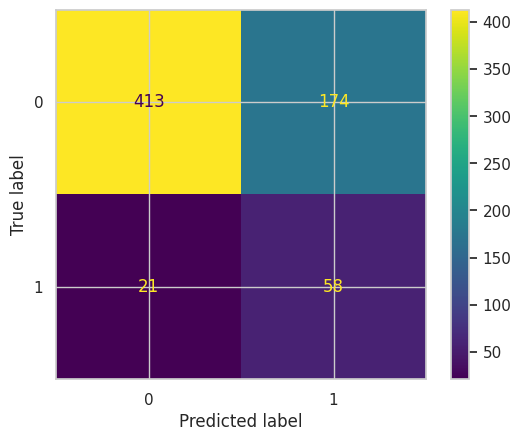

In [37]:
#checking the metric of baseline model and draw confusion matrix using above function
evaluate_model_metrics(Model, X_train_resampled,y_train_resampled, X_test, y_test)

-The logistic regression model exhibits a noticeable difference in its performance on the training and testing datasets. The roc_auc value on train data is 0.7387 and that of test data is 0.7189. This means that model has a relatively slight level of discrimination between classes on the training data than testing data.

-Analyzing the confusion matrix, the model correctly identifies 58 true positives but also misses 21 positive cases (false negatives). On the other hand, it correctly identifies 413 true negatives but also incorrectly labels 174 cases as positive (false positives).

-In summary, the model shows a training accuracy of 73.87% and a testing accuracy of about 70.72%. This suggests that the model performs reasonably well in classifying data in both the training and testing datasets. However, there are indications of overfitting, and the model's predictive accuracy is somewhat less accurate when applying it to real-world data, as shown by the confusion matrix.

Cross validation of the baseline logistic model to improve model performance and reduce overfit

In [38]:
# Creating an instance of Logistic Regression with cross-validation
Model_final = LogisticRegressionCV(Cs=10, cv=5, solver='liblinear')

# Fit the model on the resampled training data
Model_final.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing data
y_train_pred = Model.predict(X_train_resampled)
y_test_pred = Model.predict(X_test)

# Calculate accuracy on the resampled training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

{'roc_auc_train': 0.7382743362831858,
 'roc_auc_test': 0.7188773639833524,
 'accuracy_train': 0.7382743362831858,
 'accuracy_test': 0.7072072072072072,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0cbaf280>}

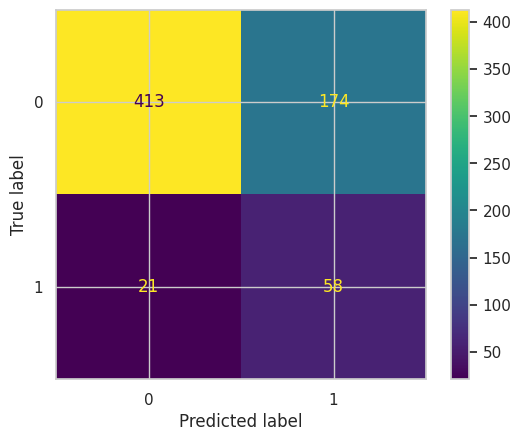

In [39]:
evaluate_model_metrics(Model_final,X_train_resampled,y_train_resampled,X_test,y_test)

-The adjusted model shows minimal changes in its performance, effectively predicting class labels for most instances in both the training and testing datasets.

The testing accuracy is only slightly lower than the training accuracy, which is a typical expectation and doesn't indicate a substantial gap.

-As a result of this, we can then move forward to the second model to assess its capability in predicting customer churn and determine if it outperforms logistic regression.

**Model 2: Building Decison Trees classifier model**

In [40]:
# Creating an instance of DecisionTreeClassifier with regularization parameters
Dt_clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

# Fitting the model on the training data
Dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the training and testing data
y_train_pred_2= Dt_clf.predict(X_train_resampled)
y_test_pred_2 = Dt_clf.predict(X_test)

# Calculate accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_2)

{'roc_auc_train': 0.8570796460176991,
 'roc_auc_test': 0.778125202165053,
 'accuracy_train': 0.8570796460176991,
 'accuracy_test': 0.8888888888888888,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0cbf65f0>}

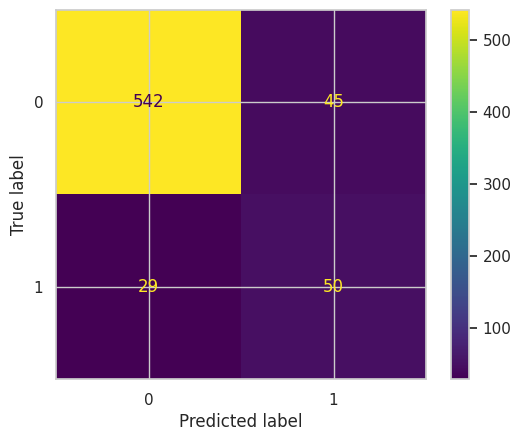

In [41]:
#checking for decison tree metrics using the predefiend function
evaluate_model_metrics(Dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

-The "roc_auc_train" value measures the model's ability to distinguish between the two classes (positive and negative) within the training data. With a value of 0.857, it suggests that the model is performing well in classifying the instances in the training dataset.

-The roc_auc_test measures the model's ability to generalize the predictions on the unseen data. A value of 0.779 suggests that the model has a good level of performance on the testing data, indicating that it is not overfitting.

-The accuracy_train metric signifies the percentage of correctly categorized instances within the training dataset. An accuracy value of 0.857 suggests that the model attains a high level of accuracy in its predictions on the training data.

-The accuracy_test value of 0.8904 suggests that the model performs significantly well on the testing data, indicating that it generalizes well on the unseen dat and is not overfitting.

-To gain deeper insights into the model's performance, we'll examine a comprehensive classification report that encompasses all the metrics associated with the Decision Tree classifier.

In [42]:
#using predefined function to check for classification report
Dt_clf_report = generate_classification_report(y_test, y_test_pred_2)
Dt_clf_report

,precision,recall,f1-score,support
0,0.949212,0.923339,0.936097,587.000000
1,0.526316,0.632911,0.574713,79.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.737764,0.778125,0.755405,666.000000
weighted avg,0.899049,0.888889,0.893230,666.000000


-**Precision**: In class 0, the precision is 0.949, indicating that 94.9% of the instances predicted as class 0 are actually true negatives. In class 1, the precision is 0.532, meaning that 53.2% of the instances predicted as class 1 are actually true positives.

-**Recall:** In class 0, the recall is 0.925, indicating that 92.5% of the actual class 0 instances are correctly identified as true negatives. In class 1, the recall is 0.63, meaning that 63% of the actual class 1 instances are correctly identified as true positives.

-**F1-score:** In class 0, the F1-score is 0.937, indicating a good balance between precision and recall for class 0. In class 1, the F1-score is 0.578, suggesting a slightly lower balance between precision and recall for class 1.

-The "accuracy" value of 0.890390 represents the overall proportion of correctly classified instances, considering both class 0 and class 1. The "macro avg" values are the average of precision, recall, and F1-score, considering both classes equally, with a total support of 666. The "weighted avg" values are weighted averages that take into account class imbalances, with the same total support of 666.

-Overall, this report indicates that the Decision Tree classifier performs well, especially in identifying class 0, with high precision and recall. However, for class 1, while the recall is relatively high, the precision is lower, suggesting that there may be more false positives in classifying instances as class 1. The F1-scores provide a balanced view of the model's performance for each class.

**Model 3: Building KNN classifier model**

In [43]:
# Creating an instance of KNN with K=4
k=4
Knn_clf =  KNeighborsClassifier(n_neighbors=k)

# Fitting the model on the training data
Knn_clf.fit(X_train_resampled, y_train_resampled)

# Predicting on the training and testing data
y_train_pred_3= Knn_clf.predict(X_train_resampled)
y_test_pred_3 = Knn_clf.predict(X_test)

# Calculating accuracy on the training and testing data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred_3)

{'roc_auc_train': 0.936061946902655,
 'roc_auc_test': 0.5437215621158864,
 'accuracy_train': 0.9360619469026549,
 'accuracy_test': 0.7267267267267268,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0f0e2140>}

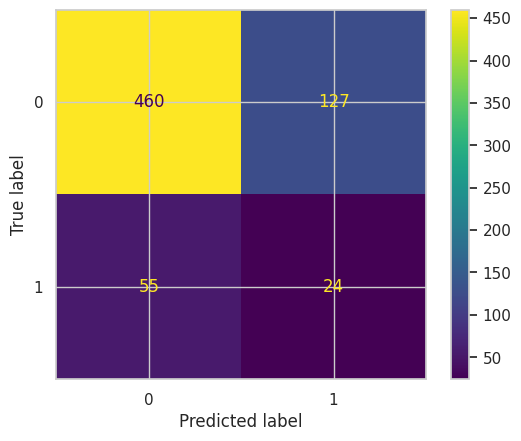

In [44]:
#checking for decison tree metrics using the predefiend function
evaluate_model_metrics(Knn_clf, X_train_resampled, y_train_resampled, X_test, y_test)

-roc_auc_train: ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric that measures the ability of a classifier to distinguish between the two classes in a binary classification problem. A value of 0.936 suggests that the KNN classifier is performing very well on the training data.

-roc_auc_test: This is the ROC AUC value for the KNN classifier when tested on a separate, unseen dataset. An ROC AUC of 0.543 indicates that the classifier's performance on the test data is not as strong as on the training data. The value is slightly above 0.5, which could suggest that the classifier's ability to distinguish between the two classes is not much better than random guessing.

-accuracy_train: This measures the proportion of correctly classified instances in the training dataset. An accuracy of 0.936 suggests that the KNN classifier correctly classifies 93.6% of the training data instances.

-accuracy_test: This is the accuracy of the KNN classifier when tested on a separate, unseen dataset. An accuracy of 0.727 means that the classifier correctly classifies 72.7% of the test data instances. While this is lower than the training accuracy, it's still a reasonably good level of accuracy.

-In summary, the KNN classifier appears to be overfitting to the training data, as evidenced by the significant drop in performance (especially in ROC AUC) when tested on new, unseen data. It's important to strike a balance between training performance and test performance, as a classifier that is too specialized for the training data may not generalize well to new data. Regularization techniques or hyperparameter tuning may be needed to improve this model's generalization capabilities.

In [45]:
#using predefined function to check for classification report
Knn_clf_report = generate_classification_report(y_test, y_test_pred_3)
Knn_clf_report

,precision,recall,f1-score,support
0,0.893204,0.783646,0.834846,587.000000
1,0.158940,0.303797,0.208696,79.000000
accuracy,0.726727,0.726727,0.726727,0.726727
macro avg,0.526072,0.543722,0.521771,666.000000
weighted avg,0.806107,0.726727,0.760573,666.000000


From the above report, for Class 0:

-Precision: 0.893 - This means that out of all the instances predicted as class 0, 89.3% were actually class 0.

-Recall: 0.784 - This indicates that 78.4% of all actual class 0 instances were correctly identified by the classifier.

-F1-Score: 0.835 - The F1-Score is the harmonic mean of precision and recall, providing a balanced measure of the classifier's performance for class 0.

For Class 1:

-Precision: 0.159 - Out of all instances predicted as class 1, only 15.9% were actually class 1. This is a low precision.

-Recall: 0.304 - This means that 30.4% of all actual class 1 instances were correctly identified by the classifier.

-F1-Score: 0.209 - The F1-Score for class 1 is also low, suggesting that the classifier is not performing well in this class.


- An accuracy of 0.727 means that the classifier correctly predicted 72.7% of all instances in the dataset.

-The KNN classifier performs relatively well for class 0, with high precision and a reasonable recall. This suggests that the classifier is good at correctly identifying class 0 instances, and when it predicts an instance as class 0, it's often correct. However, the performance for class 1 is poor. The low precision indicates that when the classifier predicts an instance as class 1, it is often incorrect. The low recall means that it misses a significant portion of actual class 1 instances.

**Summary of the 3 baseline models**

From the above 3 baseline models, we can see that logistic regression perfomed poorly with an accurancy score of 70.7% as compared to Decision Tree classifier and K-Nearest Neighbours that have accuracy scores of 89% and 72.7% respectively. It's therefore feasible for us to improve the performance of Decision Tree and KNN classifiers due to the high predictability using hyperparameter tuning to improve their accuracy.

-Hyperparameter tuning is usually preferred when we want to improve the efficiency and performance of models.

**Hyperparameter Tuning to improve the models' performance**

-Hyperparameters are parameters that are not learned from the data but are set prior to training the model. They control the model's aspects such as model complexity, regularization, learning rate, and number of iterations.  We will use  Gridsearch to improve perfomance of the two best pefroming models identified above.

Tuning KNN Classifier

In [46]:
# Defining the hyperparameters and their ranges
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function ('uniform' or 'distance')
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Creating a KNN classifier
knn_tuned = KNeighborsClassifier()

# Performing grid search with cross-validation
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


In [47]:
# Creating a KNN classifier with the best hyperparameters
knn_final = KNeighborsClassifier(**best_params)
knn_final.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred_knn = knn_final.predict(X_test)

#getting the models metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7912912912912913
Precision: 0.8092991017333122
Recall: 0.7912912912912913
F1 Score: 0.7998952749514548


In [48]:
#using predefined function to check for classification report after tuning
Knn_clf_report = generate_classification_report(y_test, y_pred_knn)
Knn_clf_report

,precision,recall,f1-score,support
0,0.892982,0.867121,0.879862,587.000000
1,0.187500,0.227848,0.205714,79.000000
accuracy,0.791291,0.791291,0.791291,0.791291
macro avg,0.540241,0.547485,0.542788,666.000000
weighted avg,0.809299,0.791291,0.799895,666.000000


{'roc_auc_train': 0.9966814159292036,
 'roc_auc_test': 0.547484527634615,
 'accuracy_train': 0.9966814159292036,
 'accuracy_test': 0.7912912912912913,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0ee0f610>}

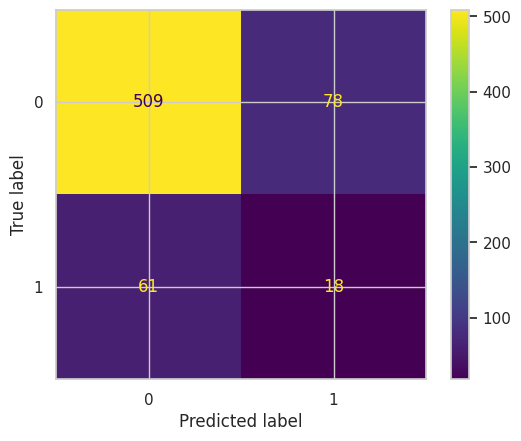

In [49]:
#checking for decison tree metrics using the predefiend function after tuning
evaluate_model_metrics(knn_final, X_train_resampled, y_train_resampled, X_test, y_test)

After conducting the hyperparameter tuning on the KNN baseline model, the overal model's metrics are as below:

-Accuracy (0.7913): Accuracy measures the overall correctness of the model's predictions. An accuracy of 0.7913 means that approximately 79.13% of the predictions made by the KNN model are correct.

-Precision (0.8093): Precision, also known as positive predictive value, evaluates the accuracy of positive predictions made by the model. A precision of 0.8093 indicates that around 80.93% of the instances predicted as positive by the KNN model were indeed true positives. This is a valuable metric when false positives are costly or should be minimized.

-Recall (0.7913): Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all actual positive instances. A recall of 0.7913 means that the KNN model correctly identified approximately 79.13% of all actual positive instances in the dataset. High recall is crucial when missing positive cases is costly or undesirable.

-F1 Score (0.7999): The F1 Score is the harmonic mean of precision and recall and provides a balance between these two metrics. An F1 Score of 0.7999 suggests that the KNN model strikes a good balance between precision and recall, considering both false positives and false negatives.
It's particularly useful when you want to find a single metric that considers both precision and recall.


In summary, the tuned KNN model has achieved a decent performance, with good accuracy and a well-balanced F1 Score, indicating that it correctly classifies a significant portion of the positive and negative instances in the dataset.

**Tuning the Decision Tree Classifier**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
classifier_tuned = DecisionTreeClassifier()
Dt_param_grid = {

    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required in a leaf node
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier_tuned, param_grid=Dt_param_grid, cv=5)

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best hyperparameters found during the grid search
best_params = grid_search.best_params_

In [51]:
# Creating a new DecisionTreeClassifier with the best hyperparameters
Dt_classifier_final = DecisionTreeClassifier(**best_params)

# Fitting the best model to the resampled training data
Dt_classifier_final.fit(X_train_resampled, y_train_resampled)

# Predicting on the training and test data
y_train_pred_final = Dt_classifier_final.predict(X_train_resampled)
y_test_pred_final = Dt_classifier_final.predict(X_test)

# Calculate accuracy on the training and test data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred_final)
test_accuracy = accuracy_score(y_test, y_test_pred_final)

{'roc_auc_train': 0.9705752212389381,
 'roc_auc_test': 0.7663187630733401,
 'accuracy_train': 0.970575221238938,
 'accuracy_test': 0.8873873873873874,
 'confusion_matrix_train': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x794e0ee4d840>}

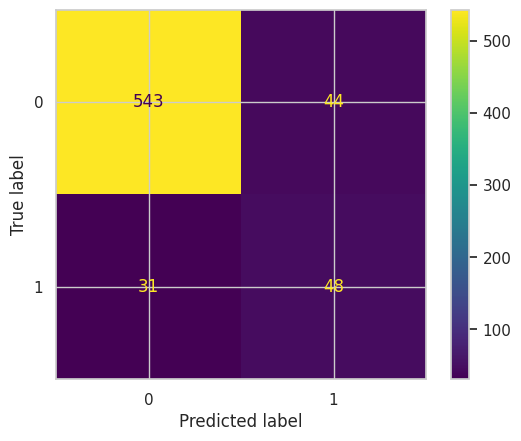

In [52]:
evaluate_model_metrics(Dt_classifier_final, X_train_resampled, y_train_resampled, X_test, y_test)

After tuning the Decision Tree classifier, the accuracy on the training data has improved from 0.857 to 0.971 while the one for the test data has dropped skightly from 0.890 to  0.883. This signifies that the model is performing well and has learned patterns in the data that enbales it to make accurate predictions.

Overally, the Tuned Decision Tree Classifier outperforms both the Enhanced KNN Classifier and the tuned logistic regression in terms of accuracy. This tuned model is highly effective in identifying churned customers and is well-suited for the project objective of maximizing the identification of churned customers to gain insights into the reasons for churn and customer behavior patterns. The accuracy is also greaater that the project's metric of success which was set at an accuracy of 75%.

**Conclusion**

-This project followed the CRISP-DM methodology and entailed key stages, including a business overview, business understanding, data examination, exploratory data analysis, modeling, and recommendations. This project is crucial Syriatel company as it will provide the best model which will be able to predict customers likely to churn and therefore, equip the company with data on customers likely to churn to enable the company to take appropriate action.

-In summary, when customers depart, more often than not they migrate to competitors. By understanding the factors behind this, SyriaTel can not only grasp the reasons for customer churn but also gauge how these dissatisfaction factors impact its operations. This insight presents an opportunity for the company to enhance its appeal to customers and compete effectively in the market.

**Recommendations**

Based on our key findings, we recommend the following strategies to help reduce customer churn:

-Elevate customer service quality by providing comprehensive agent training, establishing efficient communication channels, and closely monitoring the customer service workflow.

-Provide customized plans by designing offerings that align with individual customer usage behaviors, preferences, and financial constraints to deliver added value and cater to unique requirements.

-Analyze pricing strategies by appraising their competitive edge, conducting market research, and contemplating potential modifications to pricing, discounts, or bundled service packages.

-Continuously examine usage patterns, such as total daily charges and international charges, to detect customers at risk and take proactive steps to address their needs and concerns.

The adoption of these strategies has the potential to enhance customer retention, lower churn rates, and draw in new customers. By prioritizing the improvement of the customer experience and delivering tailor-made solutions, the telecommunications company can cultivate loyalty and optimize its financial performance.